<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab6_2_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 1. Завантаження та підготовка даних
housing = fetch_california_housing()
X, y = housing.data, housing.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


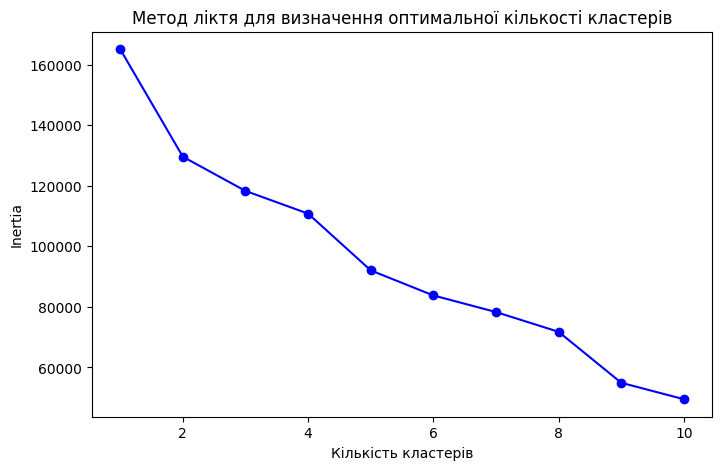

In [3]:
# 2. Метод ліктя для визначення кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

In [9]:
# 3. Оптимальна кількість кластерів (виходячи з методу ліктя це 2)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [10]:
# 4. Метод силуетів
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Середній коефіцієнт силуетів для {optimal_k} кластерів: {silhouette_avg:.4f}")

Середній коефіцієнт силуетів для 4 кластерів: 0.2679


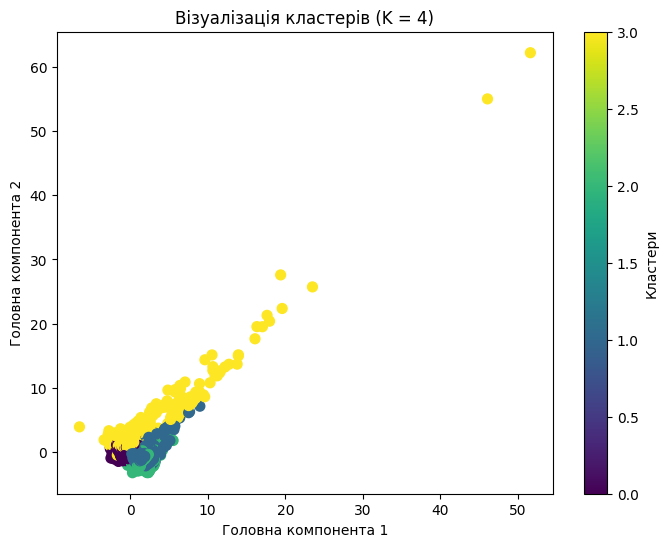

In [11]:
# 5. Візуалізація кластерів з використанням PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f'Візуалізація кластерів (K = {optimal_k})')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.colorbar(label='Кластери')
plt.show()

Висновки
За результатами кластеризації даних методом K-середніх та використанням методу ліктя, оптимальна кількість кластерів визначена на рівні 2-3. Середній коефіцієнт силуету для двох кластерів становить 0.3308, що вказує на недостатньо чітке розділення між ними. Візуалізація кластерів за допомогою PCA показала їх часткове перекриття. Це свідчить про те, що структуру даних не можна чітко розділити, і варто розглянути додаткові методи або ознаки для покращення кластеризації.